# Изучение закономерностей, определяющих успешность игр

Перед нами данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). 

**Цель исследования:** нужно выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

**Ход исследования**  
Данные получим из файла games.csv. О качестве данных ничего не известно. 

Исследование пройдёт в шесть этапов:

1. Загрузка и обзор данных. 
2. Предобработка данных. 
3. Исследовательский анализ данных. 
4. Составление портрета пользователя для каждого региона.  
5. Проверка гипотез: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 
6. Общий вывод. 

# Загрузка и обзор данных

In [1]:
#импортируем бибилиотеки
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import numpy as np
#задаю тему для seoborn
sns.set_theme(style="darkgrid")

In [2]:
#загружаю датафреймм и сохраняю в переменную df
try:
    df = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Рабочий стол\Data Analyst\github\games\games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
#вывожу первые пять строк датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#вывожу основную информацию датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#вывожу количество пропусков в каждом столбце
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#вывожу процентное соотношение пропусков в каждом столбце
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [7]:
#посмотрим на основные числовые значения столбцов
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество строк: 16715  
Количество столбцов: 11  
Тип данных в столбцах: float64(6), object(5)  
Обнаружены пропуски: 6 столбцов, самое большое количество пропусков в столбцах 'Critic_Score', 'User_Score', 'Rating'  
Столбец 'Year_of_Release' надо перевести в int  
Столбец 'User_Score' надо перевести в float 

# Предобработка данных

## Приведение названии столбцов к нижнему регистру

In [8]:
#вывожу название столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
#переименование столбцов
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Работа с пропусками

**Столбец 'name'**: от пропусков этого столбца решил избавиться, т.к. там всего 2 пропущенных значения из 16715. Для дальнейшего анализа не повлияет, процент пропущенных значений ~0.02%.  

**Столбец 'year_of_release'**: количество пропусков в этом столбце составляет 269, что составляет ~2% от всего датасета. Тоже избавимся от них. Без даты выпуска сложно будет анализировать.

**Столбец 'genre'**: здесь тоже всего 2 пропущенных значения, решил также удалить. 

Почему решил удалить пропуски в этих трех столбцах? Потому что заполнить их средним, медианным или другим каким-нибудь значением  считаю невозможным, т.к. эти столбцы содержат уникальные наборы данных, которые можно заполнить только вручную.

**Столбцы 'critic_score', 'user_score'**: в этих столбцах содержатся уникальные оценки критиков, пользователей и рейтинг от организации ESRB. Здесь тоже считаю невозможным заполнить столбцы ни средним, ни медианой, т.к. заполнив пропуски в этих столбцах я искажу данные. Удалить их не вариант, т.к. в них содержатся половина всего датасета. Я их не буду трогать и оставлю все как есть.  

**Столбец 'rating'**: здесь также аналогично как и со столбцами 'critic_score' и 'user_score', но в данном случае поставлю заглушку 'unknown', в дальнейшем он мне понадобится для выполнения пункта "Влияет ли рейтинг ESRB на продажи в отдельном регионе?".

In [10]:
#удаляю пропущенные значения в столбце 'name'
df = df.dropna(subset=['name']).reset_index(drop=True)
#проверяем
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски в столбцах 'name' и 'genre' оказались аналогичными, пропуски в столбце 'genre' также удалились

In [11]:
#удаляю пропущенные значения в столбце 'year_of_release' 
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
#проверяем
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [12]:
#поставлю заглушку 'unknown'
df['rating'] = df['rating'].fillna('unknown')

Пропуски появляются в основном при выгрузке данных, плюс к этому еще непонятно как данные рейтингов от пользователей и критиков собирались, возможно вообще рейтинг отсутствовал, такое характерно для игр прошлых лет. 
По моему мнению связь между пропусками в стоблце 'rating' и тем что эти оценки выставляет ESRB имеется. Так как компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж. К тому же основным направлением деятельности ESRB это - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Или игра возможно вообще наверно не планировалась выпускаться в Северной Америке. 

## Изменение типов данных

**Столбец 'year_of_release'**: меняю тип данных на int, т.к. здесь записан год выпуска.  
**Столбец 'user_score'**: меняю тип данных на float, т.к здесь записана оценка пользователей.  
На остальных столбцах тип данных корректный.

In [13]:
#меняю тип данных на столбце 'year_of_release'
df['year_of_release'] = df['year_of_release'].astype(int)

In [14]:
#выведем уникальные значения столбца 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди уникальных названий имеется аббревиатура 'tbd', о чем было написано в описании проекта. Это не пропуски. Расшифровывается как "to be determined", т.е. "Будет определено"  https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie. Возможно игра вышла не так давно и рейтинга ещё нет и он будет проставлен позже. 

In [15]:
#методом to_numeric переведу строковые значения в числовые, а значение 'tbd' меняю на NaN.  
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Обработаю столбец 'rating'. Редкие значения рейтингов заменим на более распространенные. 

In [16]:
#посмотрю, какие значения есть в столбце
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

In [17]:
#"EC" и "K-A" на "E", "AO" на "М" 
df['rating'] = df['rating'].replace(['EC'], 'E')
df['rating'] = df['rating'].replace(['K-A'], 'E')
df['rating'] = df['rating'].replace(['AO'], 'M')

In [18]:
#проверяем
df['rating'].value_counts()

unknown    6676
E          3932
T          2905
M          1537
E10+       1393
RP            1
Name: rating, dtype: int64

In [19]:
#первые пять строк датафрейма
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [20]:
#посмотрим что за игра с рейтингом RP
df[df['rating'] =='RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14045,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Рейтинг RP означает что игра все еще ждет определения рейтинга

In [21]:
#дропнем строку
df = df.drop(labels = [14045],axis = 0).reset_index(drop=True)

In [22]:
#проверяю наличие дубликатов в датафрейме
print('Количество дубликтов:', df.duplicated().sum())

Количество дубликтов: 0


## Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец.

In [23]:
#создаю столбец 'total_sales' 
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [24]:
#вывожу 10 строк датафрейма
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


In [25]:
#выведу еще раз числовые параметры столбцов
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000,16443.000000
mean,2006.485982,0.264028,0.145937,0.078492,0.047596,68.995114,7.126374,0.536054
std,5.875598,0.818400,0.506731,0.311109,0.188011,13.920770,1.499542,1.558828
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Суммарная продажа по всем регионам у игры Wii Sports 2006г очень сильно отличается от остальных. Таблица готова, можно приступать к следующему этапу.

# Исследовательский анализ данных

## Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

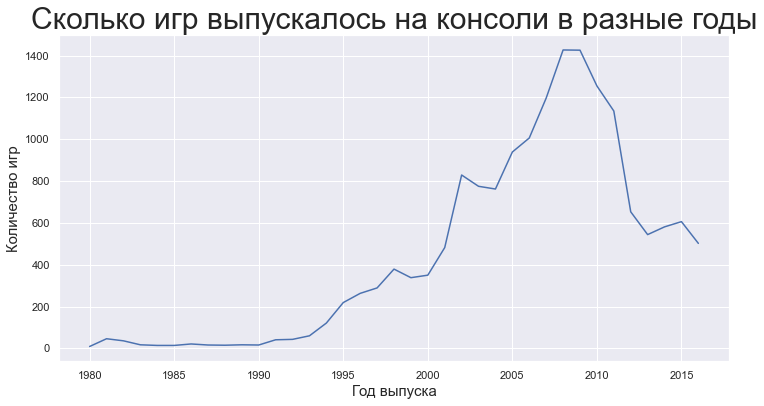

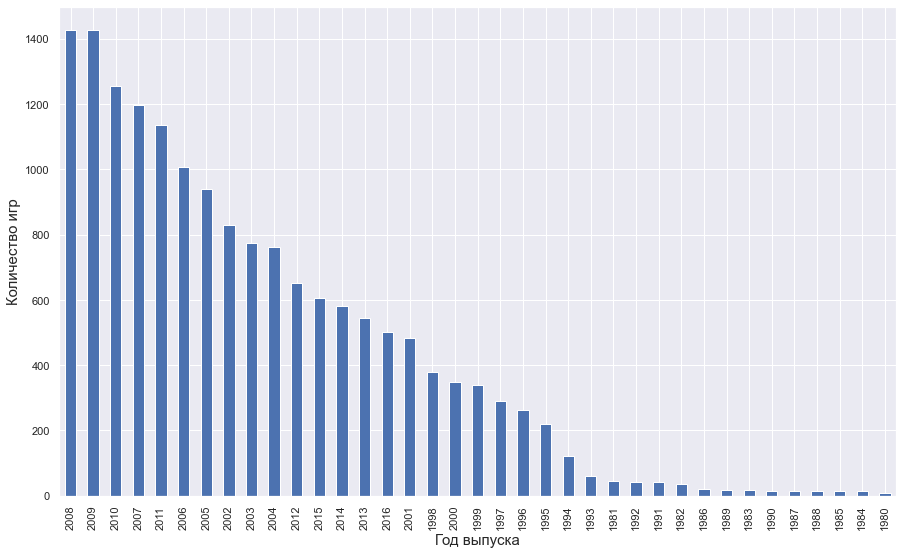

In [26]:
#группировка данных по годам, сортировка по убыванию, сохраняю в переменную amount_games
amount_games = df.groupby('year_of_release')['name'].agg('count').sort_values(ascending=False)
#построение линейного графика
plt.figure(figsize=(12,6))
sns.lineplot(data=amount_games)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.title('Сколько игр выпускалось на консоли в разные годы', fontsize=30)            
plt.show()
#построение столбчатой диаграммы
amount_games.plot(kind='bar', figsize=(15,9))
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()


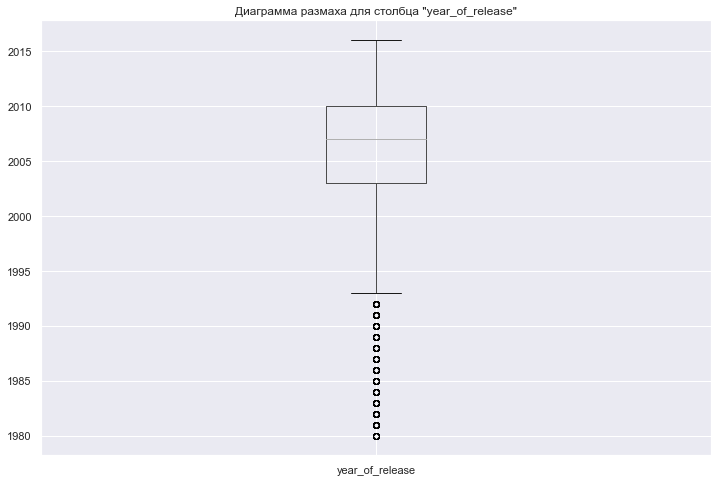

In [27]:
#диаграмма размаха для определения выбросов по годам
df.boxplot(column='year_of_release', figsize=(12, 8))
plt.title('Диаграмма размаха для столбца "year_of_release"')
plt.show()

По диаграмме размаха видно что выбросы идут до 1994 года. Количество выпущенных игр на консоли мало по этим годам, поэтому можно отсечь этот период.

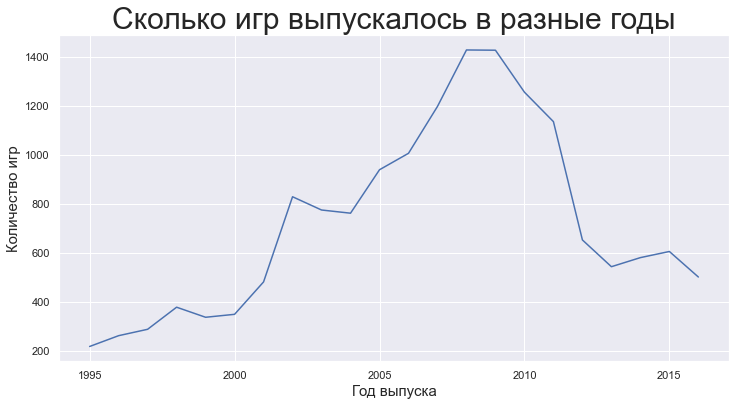

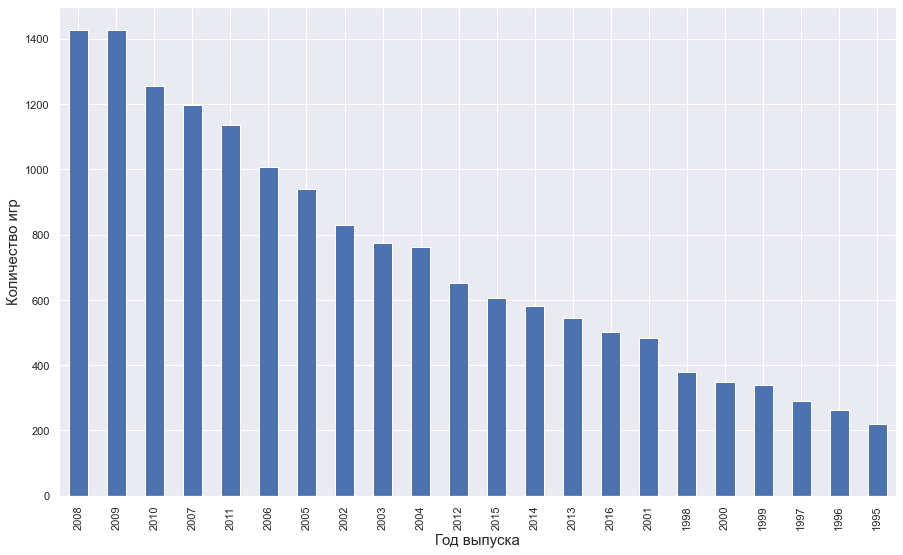

ТОП-5 разных годов по количеству выпущенных игр:


year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1135
Name: name, dtype: int64

In [28]:
#отфильтруем и заново построим графики
amount_games_sorted = df[df['year_of_release']>1994].groupby('year_of_release')['name'].agg('count').sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.lineplot(data=amount_games_sorted)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.title('Сколько игр выпускалось в разные годы', fontsize=30)            
plt.show()
amount_games_sorted.plot(kind='bar', figsize=(15,9))
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.show()
#выведем топ-5 годов
print('ТОП-5 разных годов по количеству выпущенных игр:')
amount_games.head(5)

Резкий скачок по производству игр был в 2002 году. Пик выпуска игр наблюдается в 2008-2009гг. После этого начался спад, связанный с развитием мобильных устройств и планшетов, внедрением социальных сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.



## Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [29]:
#суммарные продажи по платформам
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) 
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.72
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Возьму ТОП-6 платформ, т.к. после ТОП-6 наблюдается пропасть.

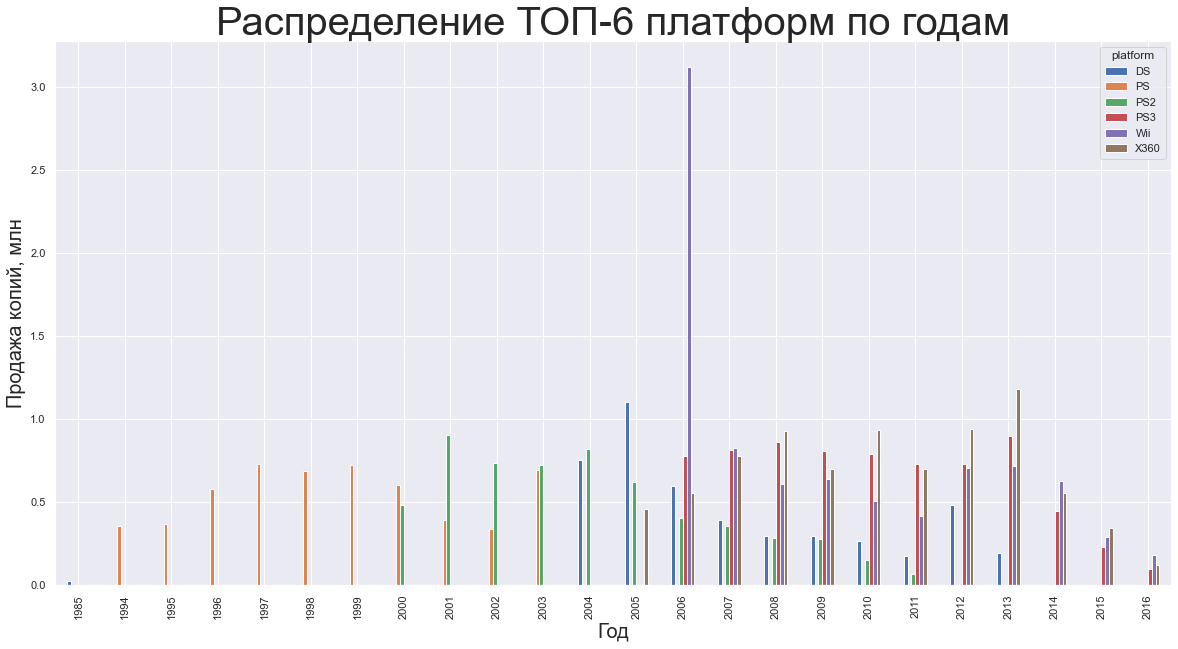

In [30]:
#топ-6 платформ включу в список
platform_best = list(platform_sales.index[:6])
#фильтруем основной датафрейм
df_platform_best = df.query('platform in @platform_best')
#строю столбчатую диаграмму по этим платформам
df_platform_best.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales').plot(kind='bar',figsize = (20,10))
plt.xlabel('Год',fontsize=20)
plt.ylabel('Продажа копий, млн',fontsize=20)
plt.title('Распределение ТОП-6 платформ по годам',fontsize=40)
plt.rc('legend', fontsize=20)
plt.show()

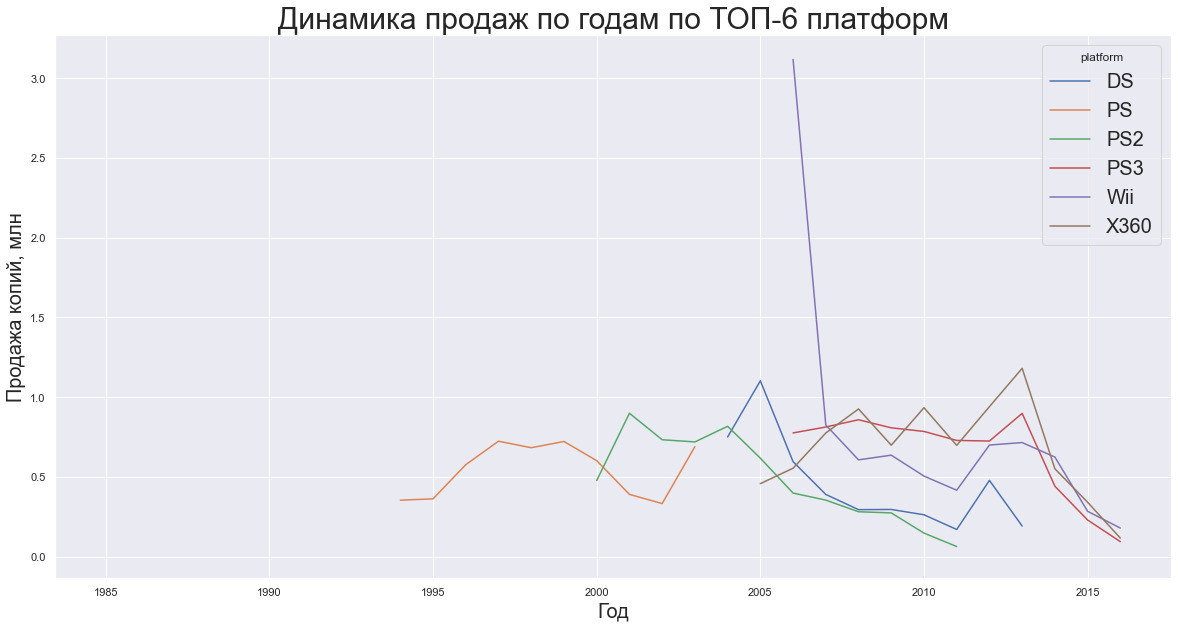

In [31]:
#построю линейный график 
df_platform_best.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales').plot(figsize=(20,10))
plt.xlabel('Год',fontsize=20)
plt.ylabel('Продажа копий, млн',fontsize=20)
plt.title('Динамика продаж по годам по ТОП-6 платформ',fontsize=30)
plt.rc('legend', fontsize=20)
plt.show()

DS - вышла в 1985. Правда в этом графике не видно. В верхнем графике наблюдается. Потом с 2004 по 2013 год - 10 активных лет;   
PS - с 1994 по 2003 - 10 лет;  
PS2 - с 2000 до 2011 года - 12 лет;  
PS3 - с 2006 по настоящее время;  
Wii - с 2006 по настоящее время;  
X360 - c 2005 по настоящее время;  




Обратим внимание на хвост у платформы DS. Там всего 2 точки: 1985 и 2004. Вряд ли игры не продавались 20 лет. Скорее всего это просто ошибка в данных.

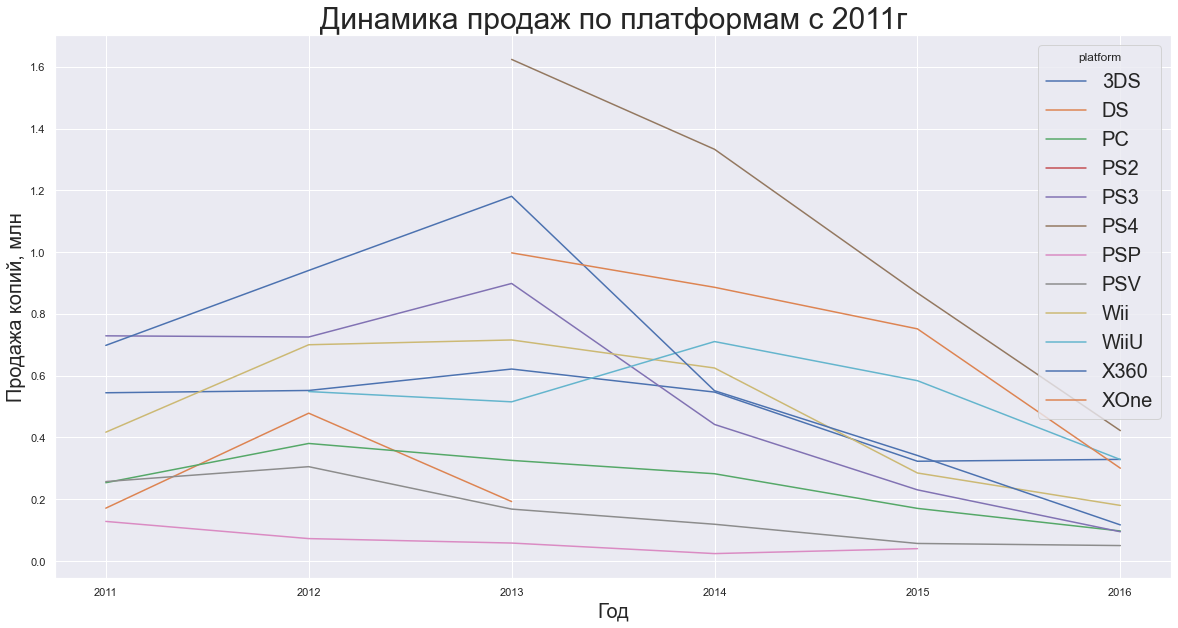

In [32]:
#построю линейный график по всему датасету с 2011г. по платформам
df.query('year_of_release>2010').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales').plot(figsize=(20,10))
plt.xlabel('Год',fontsize=20)
plt.ylabel('Продажа копий, млн',fontsize=20)
plt.title('Динамика продаж по платформам с 2011г',fontsize=30)
plt.rc('legend', fontsize=15)
plt.show()

При выборе актуальных платформ буду учитывать 9 платформ, которые все еще выпускают игры. Жаль, что платформа PSP прекратила выпускать игры. Причина, наверное, заключается в сильной конкуренции со стороны мощных смартфонов и планшетов. 

In [33]:
#создам список актуальных платформ, в дальнейшем он мне понадобится
actually_platform = df[df['year_of_release']==2016]
actually_platform = actually_platform['platform'].unique()
actually_platform = list(actually_platform)
actually_platform

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

In [34]:
#посчитаю продолжительность жизни платформ, которые перестали выпускаться
df_actually_platform = df.query('platform not in @actually_platform')
platform_life = df_actually_platform.loc[:,['year_of_release', 'platform']].drop_duplicates().pivot_table(index='platform', values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False)
print(platform_life)


          year_of_release
platform                 
GB                     13
NES                    12
PSP                    12
PS2                    12
DS                     11
2600                   10
SNES                   10
PS                     10
XB                      9
GBA                     8
N64                     7
GC                      7
DC                      7
SAT                     6
GEN                     5
NG                      4
WS                      3
3DO                     2
SCD                     2
GG                      1
PCFX                    1
TG16                    1


In [35]:
#выведу числовые параметры 
platform_life.describe()

,year_of_release
count,22.000000
mean,6.954545
std,4.064683
min,1.000000
25%,3.250000
50%,7.000000
75%,10.000000
max,13.000000


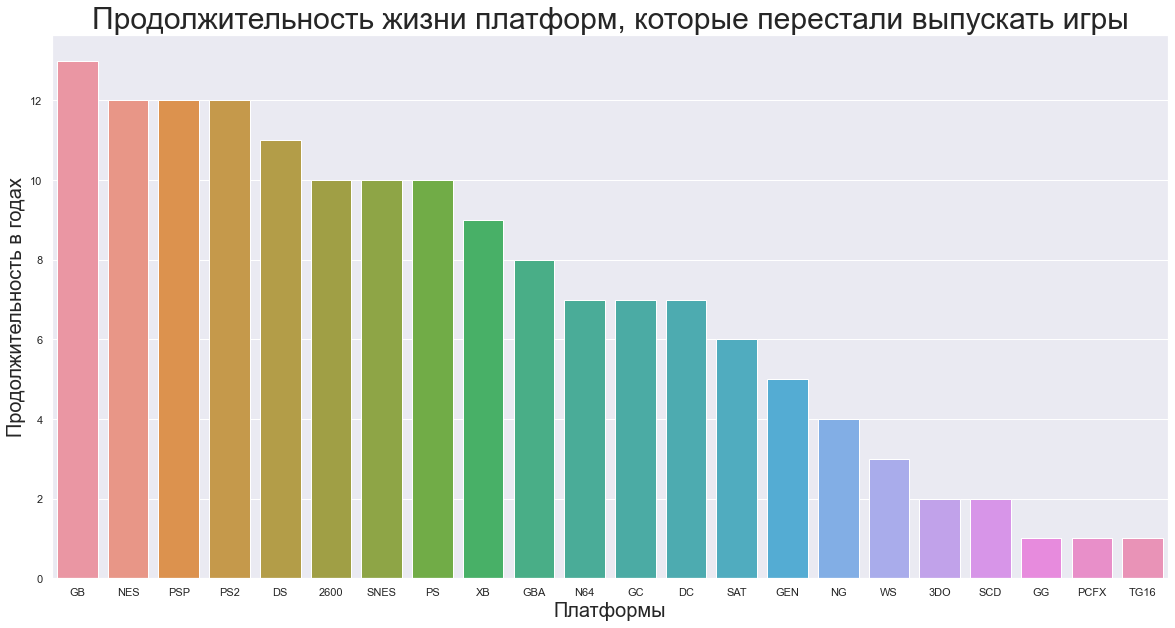

In [36]:
#построение столбчатой диаграммы с помощью seaborn
plt.figure(figsize=(20,10))
sns.barplot(x=platform_life.index, y='year_of_release', data=platform_life)
plt.title('Продолжительность жизни платформ, которые перестали выпускать игры', fontsize=30)
plt.xlabel('Платформы', fontsize=20)
plt.ylabel('Продолжительность в годах', fontsize=20)
plt.show()

**Вывод:**  
Общее число платформ: 31, из них актуальные 9  
Средняя продолжительность жизни неактивных платформ: 7 лет. GG, PCFX, TG16 - просуществовали всего лишь год.                   
Для платформ, которые пользуются популярностью продолжительность жизни составляет: 10-12 лет  
Самая живучая платформа: PC     
В 2006г у платформы Nintendo Wii был очень сильный скачок, благодаря внедрению управлением движением в играх.  
Самые большие продажи копий у платформы: PS2 

## Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
## Не учитывайте в работе данные за предыдущие годы.
## Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
## Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Актуальным периодом считаю данные с 2014 по н.в., т.е. данные за последние 3 года. Из этой выборки выберу актуальные платформы. 

In [37]:
#делаю срез основного датафрейма
df_actually=df.query('platform in @actually_platform and year_of_release >= 2014').reset_index(drop=True)
df_actually

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1672,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1673,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1674,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [38]:
#вывожу процентное соотношение пропусков
pd.DataFrame(round(df_actually.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,57.000000
user_score,47.000000


Огорчает, то что имеются пропуски. Идем дальше.

In [39]:
#группировка платформ по суммарным продажам с убыванием за актуальный период
df_actually.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
Name: total_sales, dtype: float64

ТОП-5 лидирующих платформ: PS4, XOne, 3DS, PS3, X360.

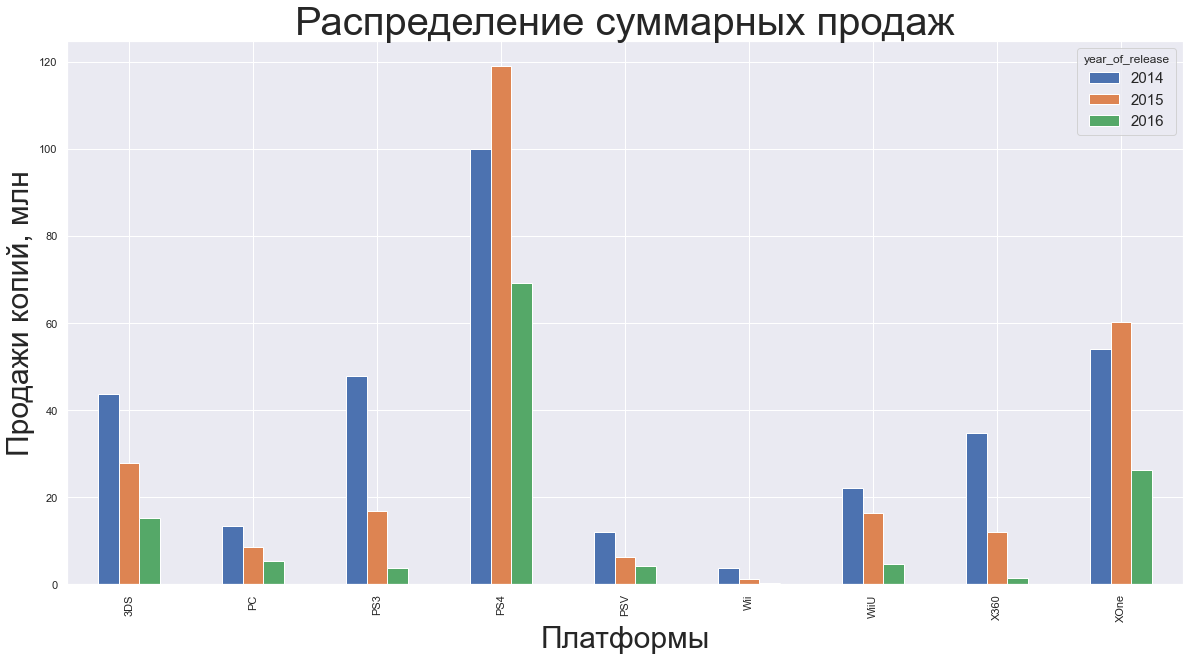

In [40]:
#столбчатая диаграмма по суммарным продажам
df_actually.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc='sum').plot(kind='bar',figsize = (20,10))
plt.title('Распределение суммарных продаж',fontsize=40)
plt.xlabel('Платформы',fontsize=30)
plt.ylabel('Продажи копий, млн', fontsize=30)
plt.show()

Наблюдаем падение суммарных продаж по всем платформам, кроме PS4 и XOne. У них в 2015 году был подъем по сравнению с остальными. В 2016 году данные неполные, не за весь год, поэтому и наблюдаем падение.  
Неприбыльные платформы - PC, PSV и Wii. 

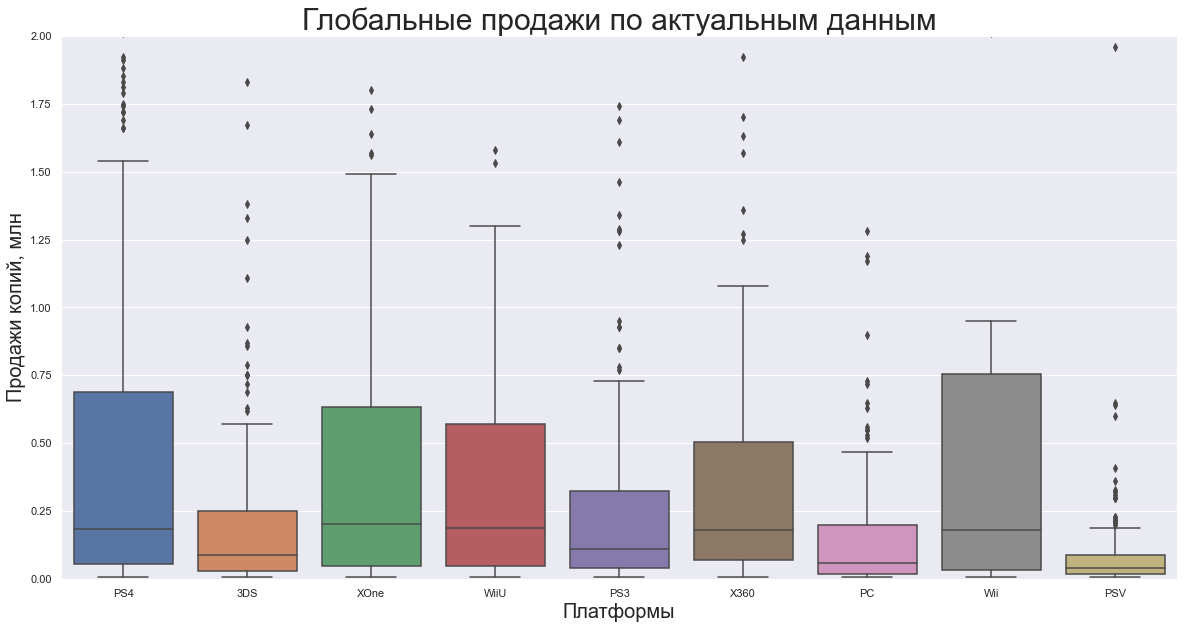

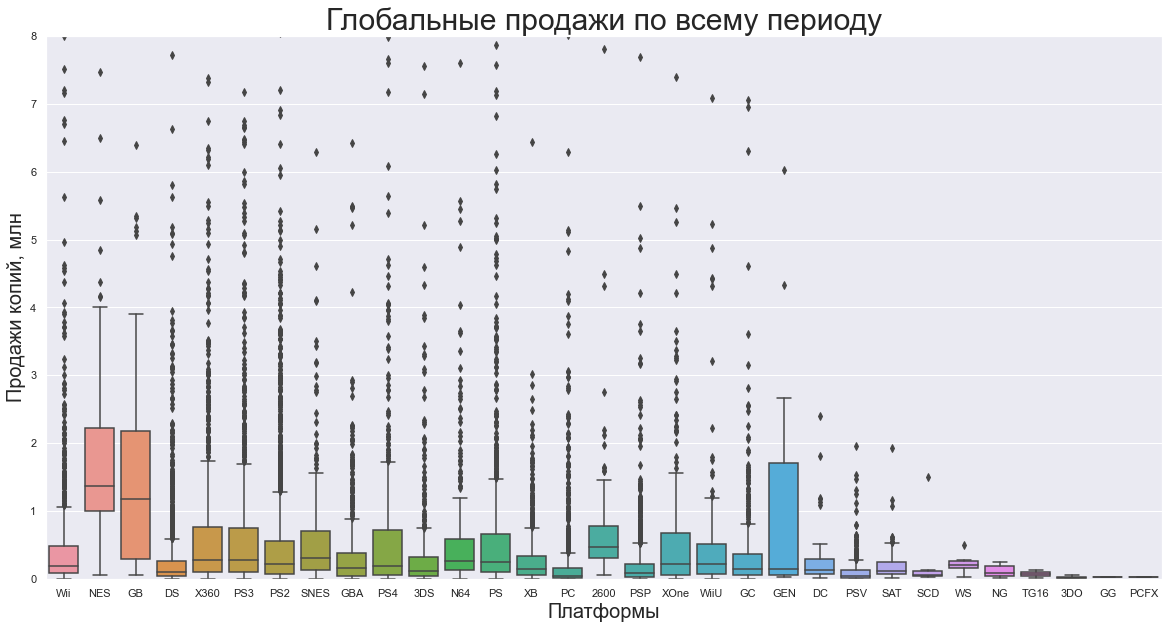

In [41]:
#график "ящик с усами" по актуальным данным
plt.figure(figsize=(20,10))
(sns.boxplot(data=df_actually, y='total_sales', x='platform').set(ylim=(0,2)))
plt.title('Глобальные продажи по актуальным данным', fontsize = 30)
plt.xlabel('Платформы', fontsize=20)
plt.ylabel('Продажи копий, млн', fontsize=20)
plt.show()
#график "ящик с усами" за весь период
plt.figure(figsize=(20,10))
(sns.boxplot(data=df, y='total_sales', x='platform').set(ylim=(0,8)))
plt.title('Глобальные продажи по всему периоду', fontsize = 30)
plt.xlabel('Платформы', fontsize=20)
plt.ylabel('Продажи копий, млн', fontsize=20)
plt.show()

По продажам лидируют платформы PS4, XOne, WiiU, Wii, X360. Различие медианных значений по лидирующим платформам небольшая, почти на одном уровне. Верхняя граница выше всех у PS4 и XOne. Платформы аутсайдеры PSV, PC, 3DS.  
Выбросы у нас в данном случае идут по значениям продаж. Выбросы характеризуют что в какие то периоды у плафтормы были единичные скачки по продажам. Это отдельные игры, которые намного лучше других продавались. 


## Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Посмотрю лидирующие платформы : PS4, XOne, WiiU

### PS4

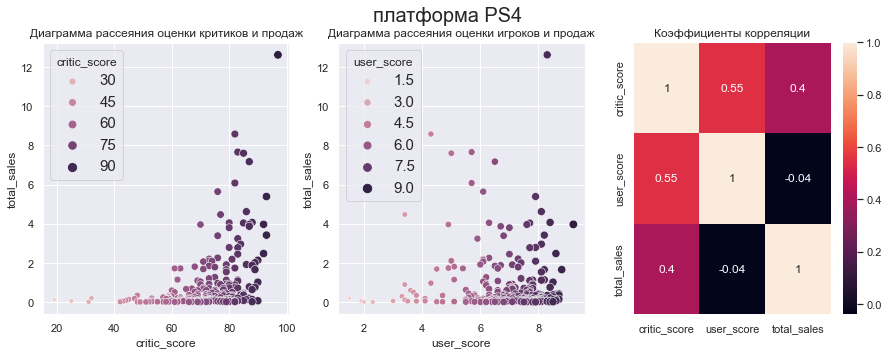

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('платформа PS4', fontsize=20)
sns.scatterplot(ax=axes[0], data=df_actually[df_actually['platform']=='PS4'], x='critic_score', y='total_sales',hue = 'critic_score',size = 'critic_score')
axes[0].set_title('Диаграмма рассеяния оценки критиков и продаж')
sns.scatterplot(ax=axes[1], data=df_actually[df_actually['platform']=='PS4'], x='user_score', y='total_sales',hue = 'user_score',size = 'user_score')
axes[1].set_title('Диаграмма рассеяния оценки игроков и продаж')
sns.heatmap(df_actually[df_actually['platform']=='PS4'][['critic_score','user_score','total_sales']].corr(),annot=True)
axes[2].set_title('Коэффициенты корреляции')
plt.show()

Коэффициент корреляции критиков: 0.4 - слабая зависимость  
Коэффициент корреляции игроков: -0.04 - линейная зависимость отсутствует 




### XOne

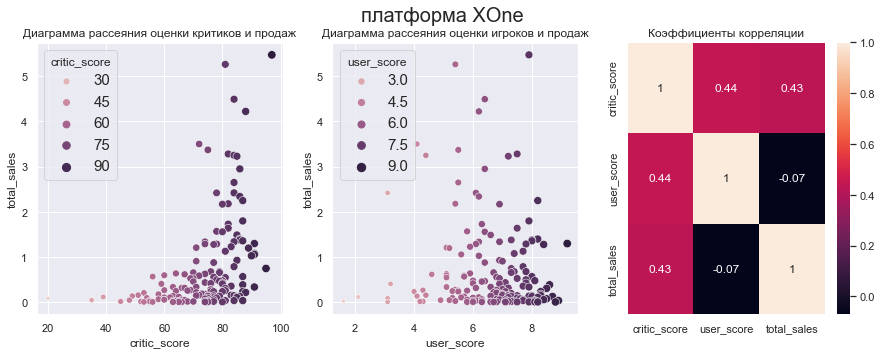

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('платформа XOne', fontsize=20)
sns.scatterplot(ax=axes[0], data=df_actually[df_actually['platform']=='XOne'], x='critic_score', y='total_sales',hue = 'critic_score',size = 'critic_score')
axes[0].set_title('Диаграмма рассеяния оценки критиков и продаж')
sns.scatterplot(ax=axes[1], data=df_actually[df_actually['platform']=='XOne'], x='user_score', y='total_sales',hue = 'user_score',size = 'user_score')
axes[1].set_title('Диаграмма рассеяния оценки игроков и продаж')
sns.heatmap(df_actually[df_actually['platform']=='XOne'][['critic_score','user_score','total_sales']].corr(),annot=True)
axes[2].set_title('Коэффициенты корреляции')
plt.show()

Коэффициент корреляции критиков: 0.43 - слабая зависимость   
Коэффициент корреляции игроков: -0.07 - линейная зависимость отсутствует

### WiiU

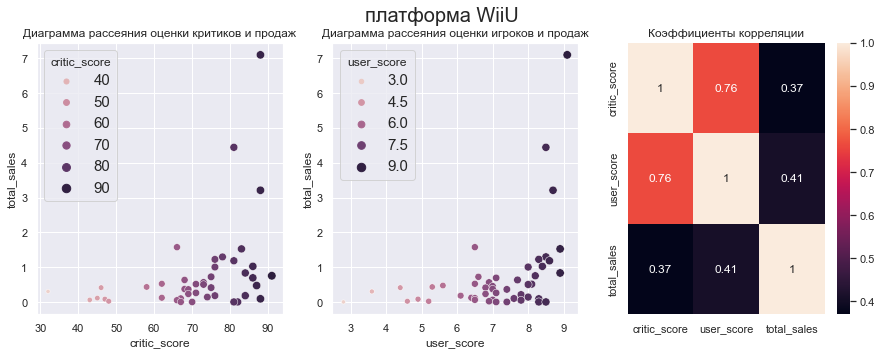

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('платформа WiiU', fontsize=20)
sns.scatterplot(ax=axes[0], data=df_actually[df_actually['platform']=='WiiU'], x='critic_score', y='total_sales',hue = 'critic_score',size = 'critic_score')
axes[0].set_title('Диаграмма рассеяния оценки критиков и продаж')
sns.scatterplot(ax=axes[1], data=df_actually[df_actually['platform']=='WiiU'], x='user_score', y='total_sales',hue = 'user_score',size = 'user_score')
axes[1].set_title('Диаграмма рассеяния оценки игроков и продаж')
sns.heatmap(df_actually[df_actually['platform']=='WiiU'][['critic_score','user_score','total_sales']].corr(),annot=True)
axes[2].set_title('Коэффициенты корреляции')
plt.show()

Коэффициент корреляции критиков: 0.37 - слабая зависимость  
Коэффициент корреляции игроков: 0.41 - слабая зависимость


На продажи оценки игроков практически не влияют на платформах PS4 и XOne. Наблюдается слабая зависимость со стороны критиков. Таким образом, критики в большей степени могут повлиять на успех игры. У платформы WiiU картина другая: и со стороны критиков и со стороны игроков наблюдается слабая зависимость.  
Если бы данные полностью были бы заполненными, результат мог бы получиться совсем другим. Так что не стоит наверно особо смотреть на эти результаты. Тем более сильной зависимости не обнаружено.

## Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [45]:
#группировка по количеству жанров 
genre_count = df_actually.groupby('genre')['name'].count().sort_values(ascending=False)
genre_count

genre
Action          613
Role-Playing    221
Adventure       181
Sports          160
Shooter         128
Misc            111
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

In [46]:
#ТОП-5 игровых жанров по количеству
genre_count.head(5)

genre
Action          613
Role-Playing    221
Adventure       181
Sports          160
Shooter         128
Name: name, dtype: int64

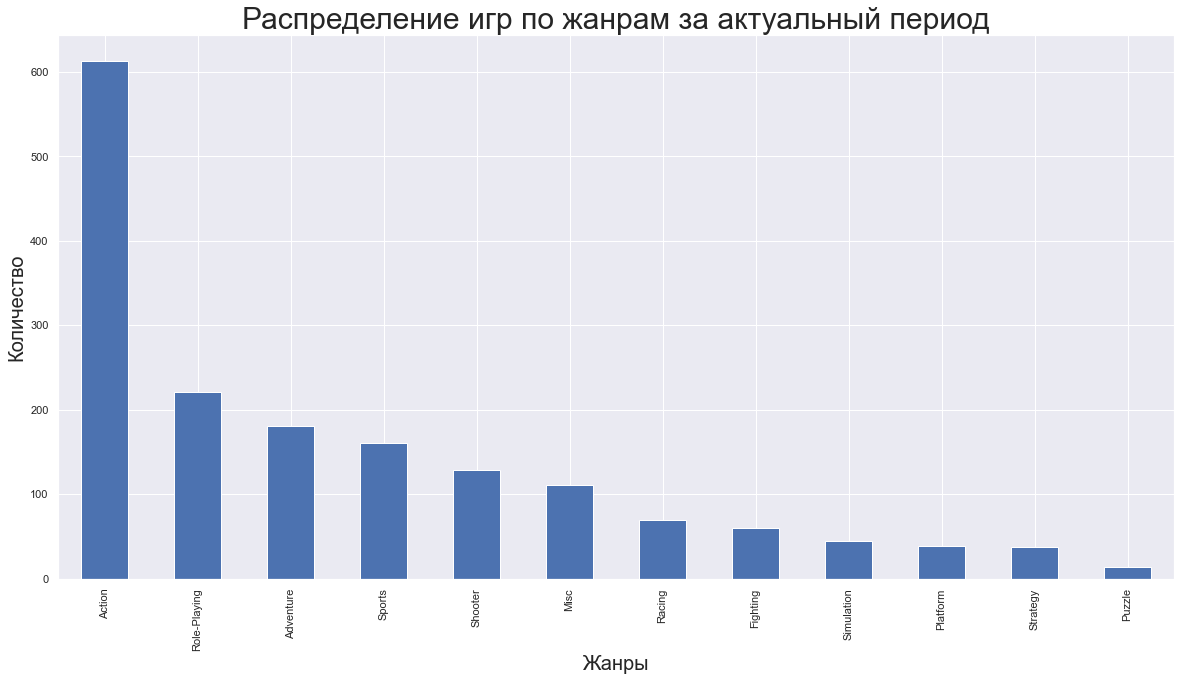

In [47]:
#столбчатая диаграмма по жанрам
genre_count.plot(kind='bar', figsize=(20,10))
plt.xlabel('Жанры', fontsize=20)
plt.ylabel('Количество', fontsize=20)
plt.title('Распределение игр по жанрам за актуальный период', fontsize=30)
plt.show()

Лидируют игры с жанром Action, Role-Playing и Adventure. Особо не выпускаются игры с жанрами Puzzle, Strategy и Platform


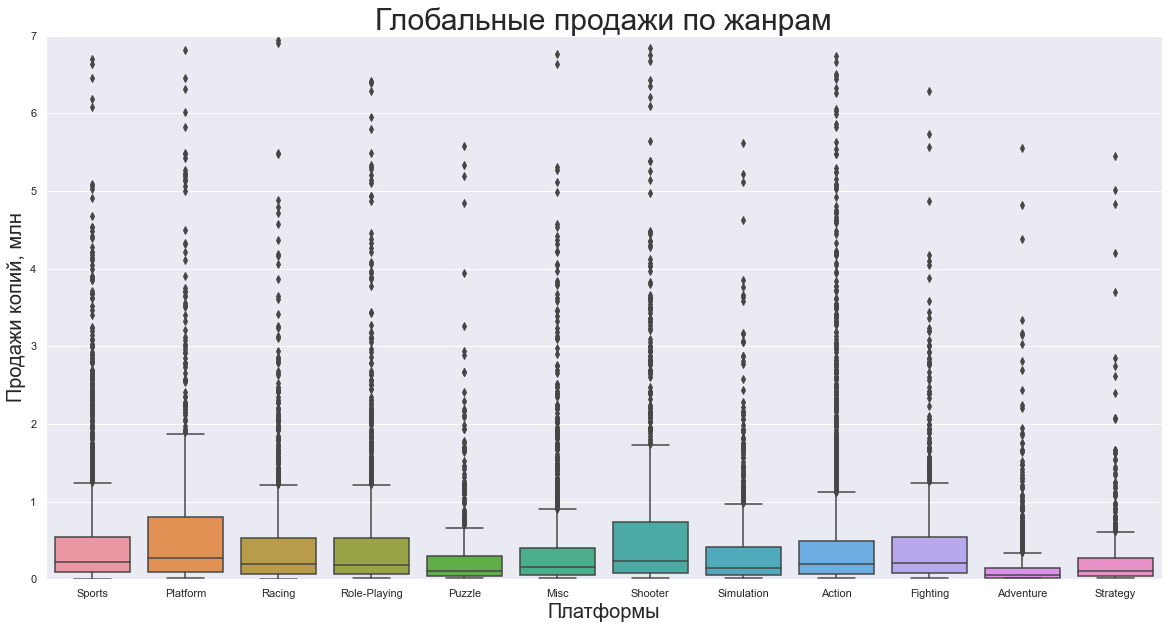

In [48]:
#график 'ящик с усами'. Посмотрим на разброс значений по жанрам. 
plt.figure(figsize=(20,10))
(sns.boxplot(data=df, y='total_sales', x='genre').set(ylim=(0,7)))
plt.title('Глобальные продажи по жанрам', fontsize = 30)
plt.xlabel('Платформы', fontsize=20)
plt.ylabel('Продажи копий, млн', fontsize=20)
plt.show()

Возьму медианное значение для определения прибыльности жанра, т.к. имеются очень много выбросов. Медианное значение более точно охарактеризует прибыльность жанра.

In [49]:
#группировка жанров по средним показателям продаж
genre_median = df_actually.groupby('genre')['total_sales'].median().sort_values(ascending=False)
genre_median

genre
Shooter         0.515
Sports          0.190
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

In [50]:
#ТОП-5 прибыльных жанров
genre_median.head(5)

genre
Shooter         0.515
Sports          0.190
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Name: total_sales, dtype: float64

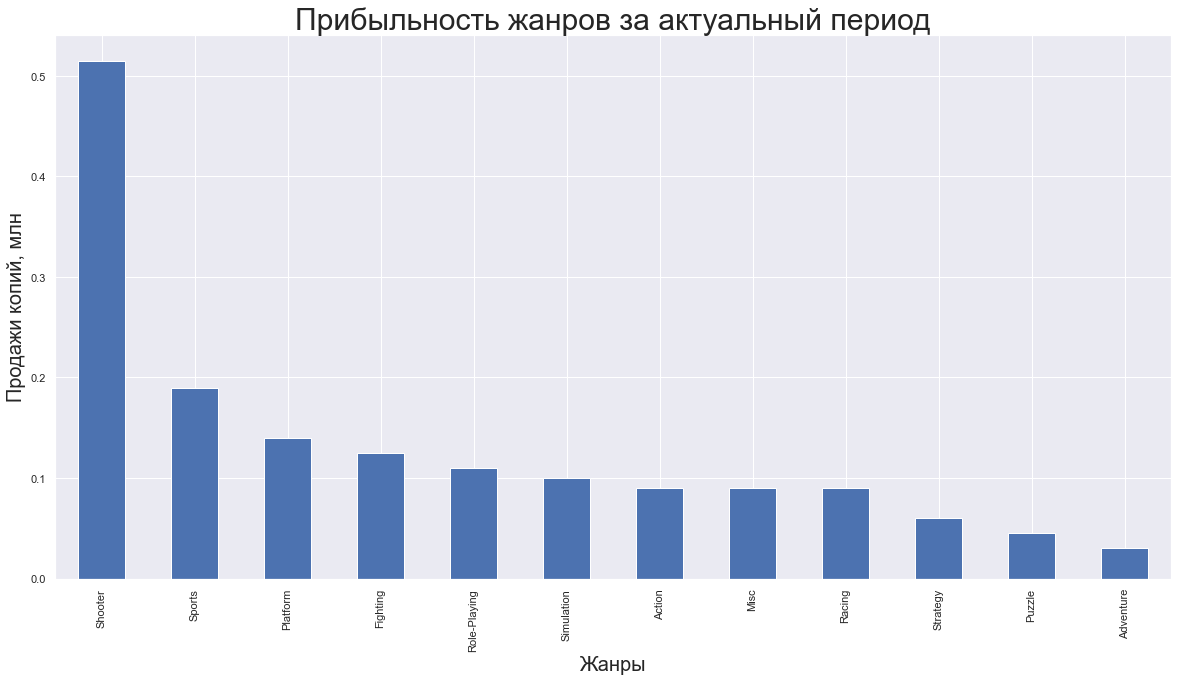

In [76]:
#столбчатая диаграмма
genre_median.plot(kind='bar', figsize=(20,10))
plt.xlabel('Жанры', fontsize=20)
plt.ylabel('Продажи копий, млн', fontsize=20)
plt.title('Прибыльность жанров за актуальный период', fontsize=30)
plt.show()

Жанр Shooter абсолютный лидер по продажам. За ним идут Sports и Platform.  
Strategy, puzzle, adventure идут на последнем месте.

# Составление портрета пользователя для каждого региона.


## Самые популярные платформы (топ-5). Опишите различия в долях продаж.

**Подготовлю датафрейм для визуализации доли продаж по платформам**

In [52]:
#добавлю столбец доли продаж
df_actually['na_share'] = df_actually['na_sales']/df_actually['na_sales'].sum()
df_actually['eu_share'] = df_actually['eu_sales']/df_actually['eu_sales'].sum()
df_actually['jp_share'] = df_actually['jp_sales']/df_actually['jp_sales'].sum()

In [53]:
#Северная Америка ТОП-5
df_actually.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [54]:
#Европа ТОП-5
df_actually.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [55]:
#Япония ТОП-5
df_actually.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [56]:
actually_platform

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

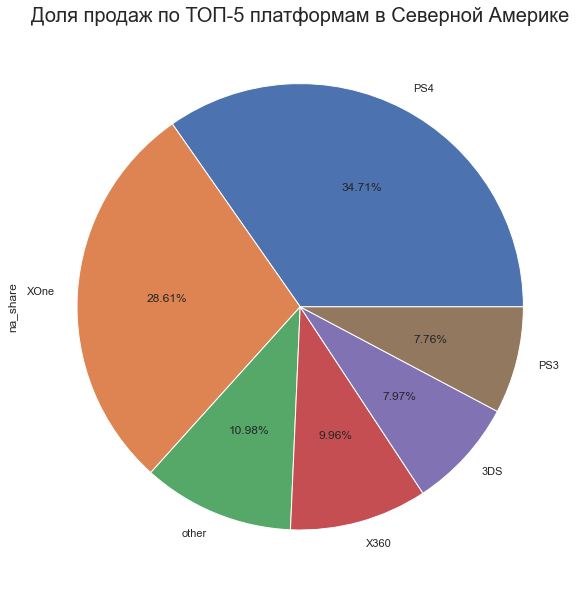

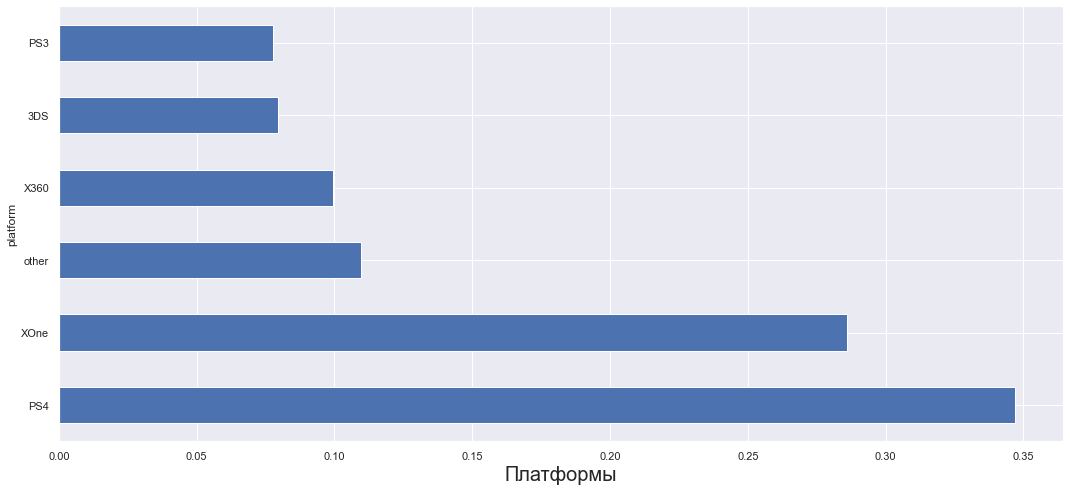

In [77]:
#группировка данных, платформы которые не входят в ТОП-5 включил в группу 'other'
df_actually.groupby(df_actually['platform'].\
                           replace(['Wii','WiiU','PC','PSV'], 'other'))['na_share'].sum().sort_values(ascending=False).\
                           plot(kind='pie', figsize=(10,20), autopct='%1.2f%%')#построение пирога для визуализации
plt.title('Доля продаж по ТОП-5 платформам в Северной Америке', fontsize=20)
plt.show()
df_actually.groupby(df_actually['platform'].\
                           replace(['Wii','WiiU','PC','PSV'], 'other'))['na_share'].sum().sort_values(ascending=False).\
                           plot(kind='barh',figsize=(18,8))#построение барплота
plt.xlabel('Платформы', fontsize=20)
plt.show()


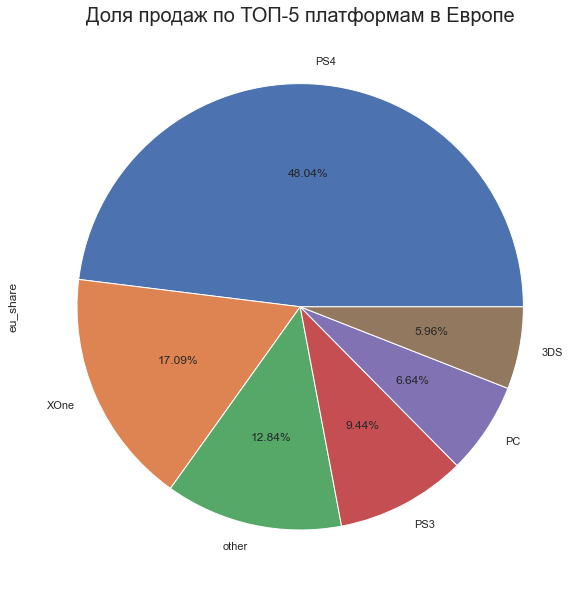

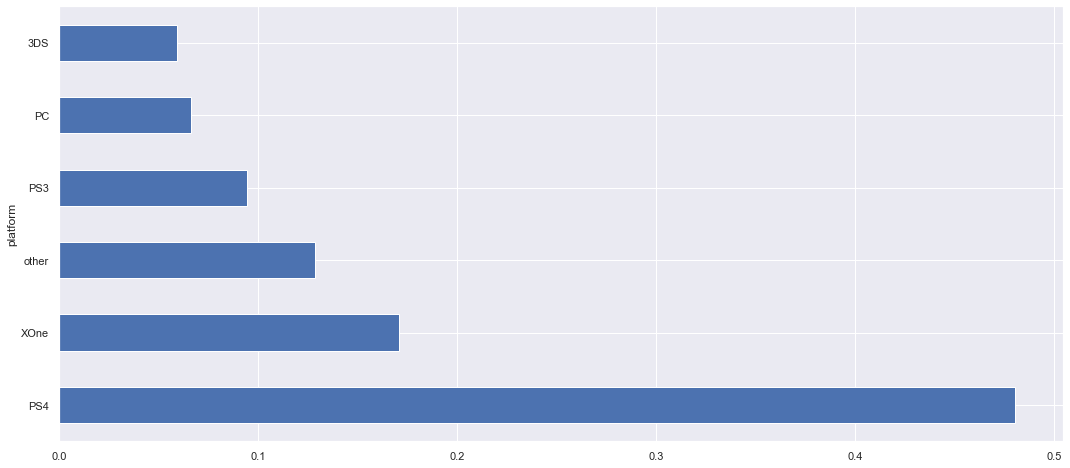

In [78]:
#группировка данных, платформы которые не входят в ТОП-5 включил в группу 'other'
df_actually.groupby(df_actually['platform'].\
                           replace(['X360', 'PSV', 'Wii','WiiU'], 'other'))['eu_share'].sum().sort_values(ascending=False).\
                           plot(kind='pie', figsize=(10,20), autopct='%1.2f%%')#построение пирога для визуализации
plt.title('Доля продаж по ТОП-5 платформам в Европе', fontsize=20)
plt.show()
df_actually.groupby(df_actually['platform'].\
                           replace(['X360', 'PSV', 'Wii','WiiU'], 'other'))['eu_share'].sum().sort_values(ascending=False).\
                           plot(kind='barh', figsize=(18,8))#построение столбчатой диаграммы для визуализации
plt.show()

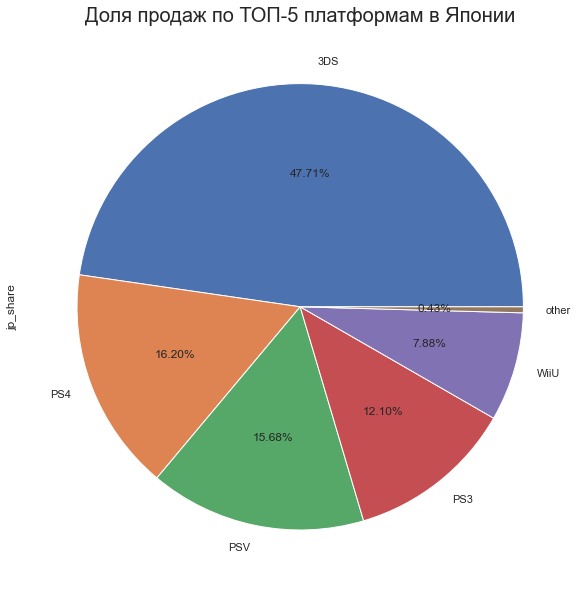

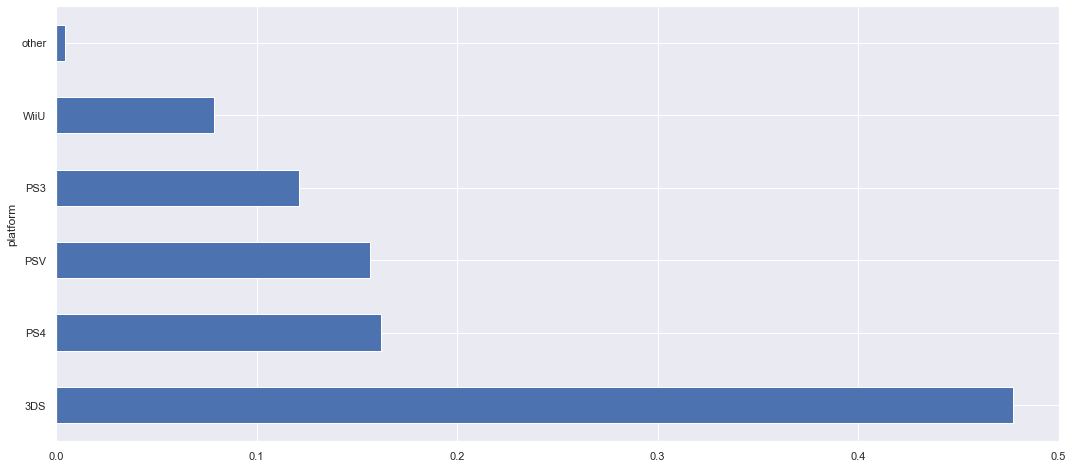

In [79]:
#группировка данных, платформы которые не входят в ТОП-5 включил в группу 'other'
df_actually.groupby(df_actually['platform'].\
                           replace(['XOne','Wii','X360', 'PC'], 'other'))['jp_share'].sum().sort_values(ascending=False).\
                           plot(kind='pie', figsize=(10,20), autopct='%1.2f%%')#построение пирога для визуализации
plt.title('Доля продаж по ТОП-5 платформам в Японии', fontsize=20)
plt.show()
#группировка данных, платформы которые не входят в ТОП-5 включил в группу 'other'
df_actually.groupby(df_actually['platform'].\
                           replace(['XOne','Wii','X360', 'PC'], 'other'))['jp_share'].sum().sort_values(ascending=False).\
                           plot(kind='barh',figsize=(18,8))#построение столбчатой диаграммы для визуализации
plt.show()

В Японии лидером является платформа 3DS. Япония сильно отличается от Европы и Северной Америки. В Европе и в Северной Америке предпочитают PS4 и XOne. 

## Самые популярные жанры (топ-5). Поясните разницу.

In [60]:
#Северная Америка ТОП-5
df_actually.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

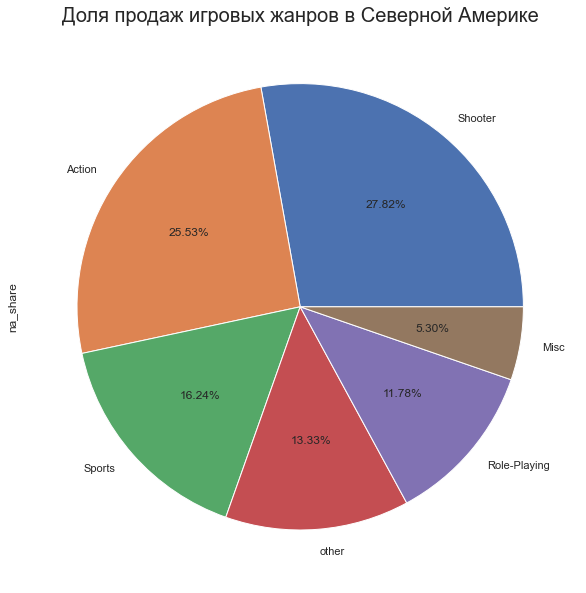

In [61]:
#группировка данных, жанры которые не входят в ТОП-5 включил в группу 'other'
df_actually.groupby(df_actually['genre'].\
            replace(['Fighting','Racing','Platform', 'Simulation', 'Adventure', 'Puzzle','Strategy'], 'other'))['na_share']\
            .sum().sort_values(ascending=False).\
            plot(kind='pie', figsize=(10,20), autopct='%1.2f%%')#построение пирога для визуализации
plt.title('Доля продаж игровых жанров в Северной Америке', fontsize=20)
plt.show()

В Северной Америке лидирует Shooter, Action и Sports.

In [62]:
#Европа ТОП-5
df_actually.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

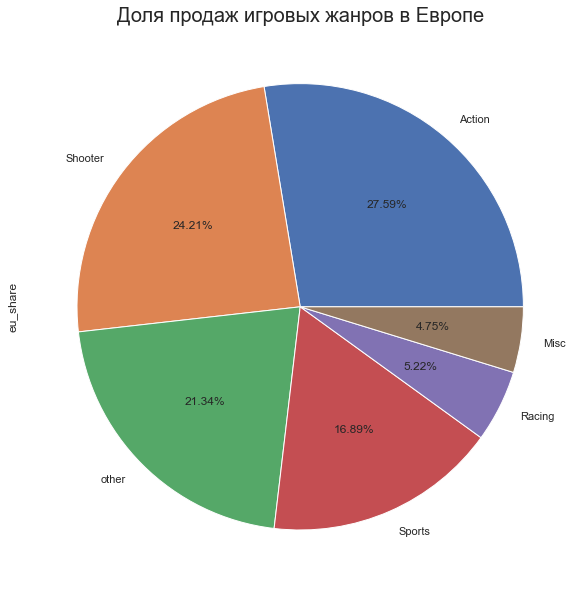

In [63]:
#группировка данных, жанры которые не входят в ТОП-5 включил в группу 'other'
df_actually.groupby(df_actually['genre'].\
            replace(['Fighting','Role-Playing', 'Platform', 'Simulation', 'Adventure', 'Puzzle','Strategy'], 'other'))['eu_share']\
            .sum().sort_values(ascending=False).\
            plot(kind='pie', figsize=(10,20), autopct='%1.2f%%')#построение пирога для визуализации
plt.title('Доля продаж игровых жанров в Европе', fontsize=20)
plt.show()

В Европе лидирующая группа  такая же как в Северной Америке, только на первом месте Action.

In [64]:
#Япония ТОП-5
df_actually.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    31.16
Action          29.38
Fighting         6.37
Misc             5.59
Shooter          4.87
Name: jp_sales, dtype: float64

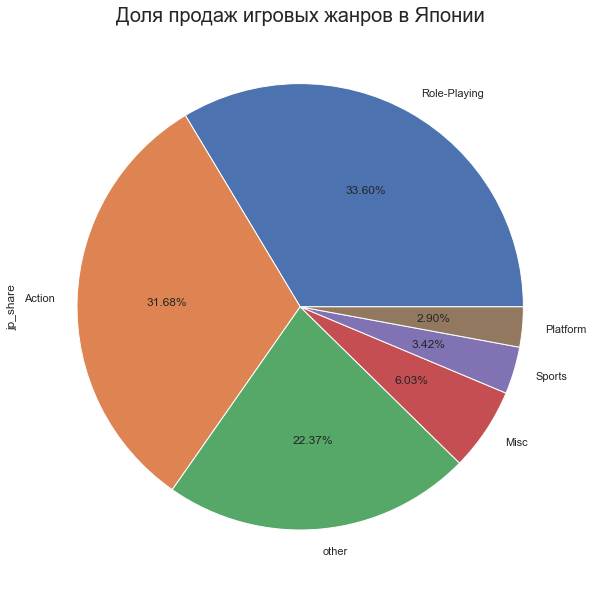

In [65]:
#группировка данных, жанры которые не входят в ТОП-5 включил в группу 'other'
df_actually.groupby(df_actually['genre'].\
            replace(['Racing', 'Shooter', 'Simulation','Fighting', 'Adventure', 'Puzzle','Strategy'], 'other'))['jp_share']\
            .sum().sort_values(ascending=False).\
            plot(kind='pie', figsize=(10,20), autopct='%1.2f%%')#построение пирога для визуализации
plt.title('Доля продаж игровых жанров в Японии', fontsize=20)
plt.show()


Японцы также отличаются от Северной Америки и Европы. Больше всего любят играть в Role-Playing. На втором месте Action. В Sports практически не играют.

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Расшифровка по рейтингам, которые присваивает компания ESRB**

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A"


«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».



«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [66]:
df['rating'].value_counts()

unknown    6676
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

In [67]:
#подготовлю данные, чтоб было понятно добавлю разъяснение
ESRB = {'E': 'Для всех', 'E10+': '>10 лет', 'M': 'Для взрослых', 'T': '>13 лет','unknown':'unknown'}
df_actually['ESRB'] = df_actually[df_actually['rating'].notnull()]['rating'].map(ESRB)

In [68]:
#группировка рейтинга ESRB и продаж (все регионы, включая другие)
esrb = df_actually.groupby('ESRB')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()
#вывод на экран
print('Данные за актуальный период')
display(esrb)

Данные за актуальный период


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8068\1861186277.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb = df_actually.groupby('ESRB')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()


,na_sales,eu_sales,jp_sales,other_sales
ESRB,,,,
>10 лет,33.23,26.16,4.46,7.83
>13 лет,38.95,34.07,14.78,11.33
unknown,64.72,58.95,56.54,18.40
Для взрослых,96.42,93.44,8.01,28.67
Для всех,50.74,58.06,8.94,15.39


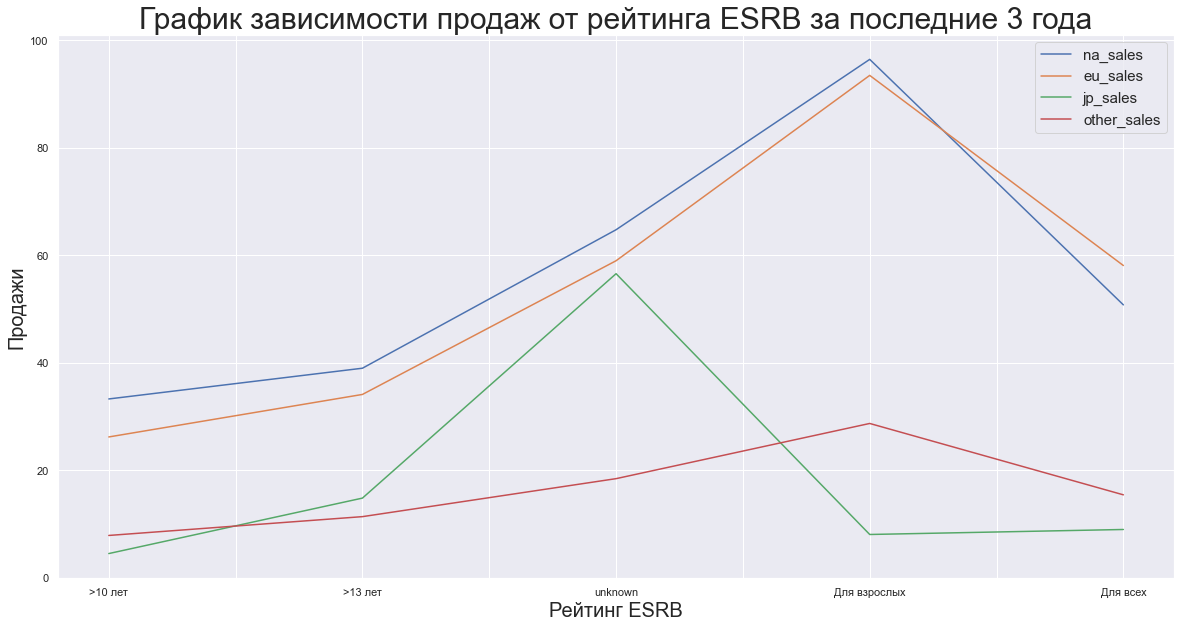

In [69]:
#линейный график
esrb.plot(figsize=(20,10))
plt.xlabel('Рейтинг ESRB',fontsize=20)
plt.ylabel('Продажи',fontsize=20)
plt.title('График зависимости продаж от рейтинга ESRB за последние 3 года',fontsize=30)
plt.rc('legend', fontsize=20)
plt.show()

В Северной Америке и в Европе предпочитают игры с рейтингом "для всех" и "для взрослых". Большая часть выручки получено с игр с рейтингом "для всех" и "для взрослых". Японцы тоже отличилсь. В Японии на большинство игр рейтинг не проставлен от ESRB. Потому что в Японии возрастными рейтингами занимается в основном компания CERO. На втором - игры для лиц от 13 лет. Играют там с раннего детства.  


# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (st.ttest_ind)

In [70]:
#подготовлю данные и избавлюсь от пропущенных значений
xbox_one = df_actually.query('platform == "XOne"')['user_score'].dropna().reset_index(drop=True)
pc = df_actually.query('platform == "PC"')['user_score'].dropna().reset_index(drop=True)

In [71]:
#посчитаю дисперсии и средние значения
print ('Дисперсия рейтинга платформы Xbox One:', np.var(xbox_one))
print ('Дисперсия рейтинга платформы PC:', np.var(pc))
print ('Среднее значение рейтинга платформы Xbox One:', xbox_one.mean())
print ('Среднее значение рейтинга платформы PC:', pc.mean())

Дисперсия рейтинга платформы Xbox One: 1.87954600550964
Дисперсия рейтинга платформы PC: 2.877374361730719
Среднее значение рейтинга платформы Xbox One: 6.594545454545453
Среднее значение рейтинга платформы PC: 6.298360655737703


In [72]:
#выбрал минимальное значение
alpha = 0.01 
#дисперсии отличаются, поэтому поставил False
results = st.ttest_ind(xbox_one, pc, equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Действительно среднее значение рейтингов было похожее. Не получилось отвергнуть нулевую гипотезу, что и подтверждает наш тест.

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [73]:
#подготовлю данные и избавлюсь от пропущенных значений
action = df_actually.query('genre == "Action"')['user_score'].dropna().reset_index(drop=True)
sports = df_actually.query('genre == "Sports"')['user_score'].dropna().reset_index(drop=True)

In [74]:
#посчитаю дисперсии
print ('Дисперсия рейтинга платформы Xbox One:', np.var(action))
print ('Дисперсия рейтинга платформы PC:', np.var(sports))
print ('Среднее значение рейтинга платформы Xbox One:', action.mean())
print ('Среднее значение рейтинга платформы PC:', sports.mean())

Дисперсия рейтинга платформы Xbox One: 1.8920844811753907
Дисперсия рейтинга платформы PC: 3.419837559675118
Среднее значение рейтинга платформы Xbox One: 6.760606060606054
Среднее значение рейтинга платформы PC: 5.225196850393697


In [75]:
#выбрал минимальное значение
alpha = 0.01 
#дисперсии отличаются, поэтому поставил False
results = st.ttest_ind(action, sports, equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Получилось отвергнуть нулевую гипотезу, что и подтверждает наш тест. Действительно, средние значения были разными.

# Общий вывод

1. Перед проведением анализа данных я подготовил данные:
- Привел название стобцов к нижнему регистру
- Привел к правильным типам данных необходимые столбцы
- Выставил заглушку в пропусках на столбце 'rating'
- Определил, что аббревиатура 'TBD' расшифровывается как "to be determined", т.е. "Будет определено"
- Добавил разъяснение по рейтингам ESRB, обработал столбец 'rating'. Редкие значения рейтингов заменил на более распространенные.

2. При проведении анализа выяснил: 
- Производство игр начало расти с 1990-х годов до 2008г. Дальше идет спад в связи с появлением на рынке мощных смартфонов и планшетов, в связи с внедрением соц.сетей в жизнь населения. В связи с этим интерес упал, далее производство упало. 
- ТОП-6 платформ за весь период по суммарным продажам:   
 PS2     1233.56млн  
 X360     961.24млн  
 PS3      931.34млн  
 Wii      891.18млн  
 DS       802.78млн  
 PS       727.58млн 
- Суммарные продажи по всем платформам падают  
- У Wii был сильный скачок в 2006г. благодаря внедрению управлением движением в играх
- Средний срок жизни платформы составляет 7 лет
- Из 31 платформ остались актуальными 9: 'PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'
- По глобальным продажам лидируют PS4, XOne, WiiU, Wii, X360.
- Выяснили что от оценки критиков и игроков продажи по лидирующим платформам особо не влияют:    
PS4:  
 - Коэффициент корреляции критиков: 0.4 - слабая зависимость  
 - Коэффициент корреляции игроков: -0.04 - линейная зависимость отсутствует      
XOne:  
 - Коэффициент корреляции критиков: 0.43 - слабая зависимость
 - Коэффициент корреляции игроков: -0.07 - линейная зависимость отсутствует    
WiiU:
 - Коэффициент корреляции критиков: 0.37 - слабая зависимость
 - Коэффициент корреляции игроков: 0.41 - слабая зависимость

3. Составили портреты для каждого региона:    
 Северная Америка ТОП-3 по платформам: PS4, XOne, X360  
 Европа ТОП-3 по платформам: PS4, XOne, PS3  
 Япония ТОП-3 по платформам: 3DS, PS4, PSV  
 
 Северная Америка ТОП-3 по жанрам: Shooter, Action, Sports  
 Европа ТОП-3 по жанрам: Action, Shooter, Sports  
 Япония ТОП-3 по жанрам: Role Playing, Action, Misc  
 
 При составлении портретов выяснили, что Япония сильно отличается от Европы и Северной Америки. Самый прибыльный жанр - Shooter.

4. Проверили две гипотезы. Гипотезы оба подтвердились. 
  
  
5. Рекомендации на основе проведенного анализа на 2017 год.  

Исходя из проведенного анализа за 2014-2016гг предполагаю на следующий год лучше всего продавать игры для таких приставок, как PS4 и XOne. Они популярны в большинстве стран мира. Жанр необходимо выбирать Shooter и выбирать игры с рейтингом М: "от 17 и выше". Остальные два популярных жанра стоит тоже посмотреть: Action и Sports.  
Если смотреть на рынок Японии, они в основном играют на платформу 3DS и в жанре Role-Playing.
